In [1]:
import pandas as pd
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT,Hodograph
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Cannot import USCOUNTIES and USSTATES without Cartopy installed.


In [2]:
up=pd.read_csv(r'/Users/sarahpurpura/Desktop/Thesis/Soundings/sounding/Composites/All Composite - Up-Cross.csv')
peak=pd.read_csv(r'/Users/sarahpurpura/Desktop/Thesis/Soundings/sounding/Composites/All Composite - Peak-Cross.csv')
down=pd.read_csv(r'/Users/sarahpurpura/Desktop/Thesis/Soundings/sounding/Composites/All Composite - Down-Cross.csv')

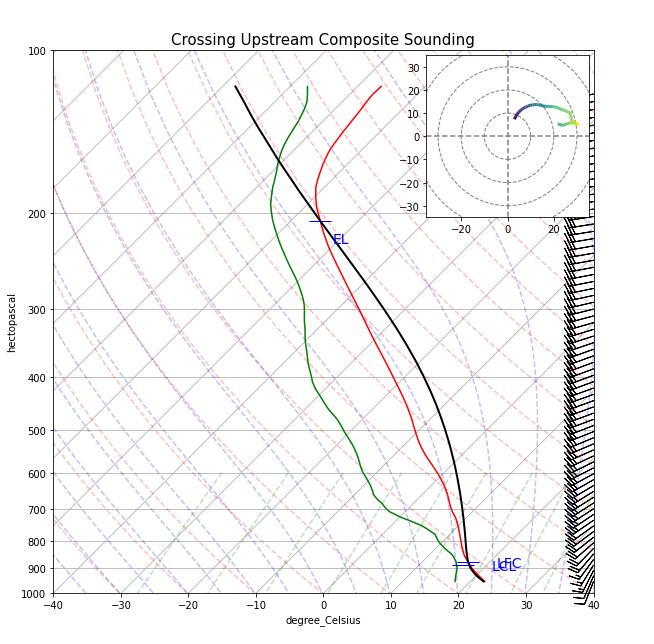

In [4]:
#Upstream
pres=((up['Mean Pressure']).tolist())*units('hPa')
temp=((up['Mean Temp']).tolist())*units('degC')
dew=((up['Mean Dew']).tolist())*units('degC')
prof=((up['Mean Profile']).tolist())*units('degC')
u=np.array(up['Mean U'])
v=np.array(up['Mean V'])
wspd=np.array(up['Mean Wind'])

lcl_p,lcl_t=mpcalc.lcl(pres[1],temp[1],dew[1]) 
lfc_p,lfc_t=mpcalc.lfc(pres[1:],temp[1:],dew[1:],prof[1:])
el_p,el_t=mpcalc.el(pres[1:],temp[1:],dew[1:],prof[1:])



##Change default to be better for skew-T
fig= plt.figure(figsize=(10,10))
skew = SkewT(fig,rotation=45)

##Plot the data using normal plotting functions, in this case using
##log scaling in Y, as dictated by the typical meteorological plot
skew.plot(pres, temp, 'r')
skew.plot(pres, dew, 'g')
skew.plot_barbs(pres[:-1:2], u[:-1:2], v[:-1:2])

##Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233,533,10)*units('K'),alpha=0.25)
skew.plot_moist_adiabats(t0=np.arange(233,323,5)*units('K'),alpha=0.25)
skew.plot_mixing_lines(alpha=0.25)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40,40)

##Calculate full parcel profile and add to plot as black line
##Requires that the variables have associated units
    #prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
skew.plot(pres, prof, 'k', linewidth=2)


##this will add a line and place where the LCL is located
skew.plot(lcl_p,lcl_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(lcl_t.to('degC').m+5,lcl_p.m+20,'LCL',color='blue',size=14)

##this will add a line and place where the LFC is located
skew.plot(lfc_p,lfc_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(lfc_t.to('degC').m+5,lfc_p.m+20,'LFC',color='blue',size=14)

##this will add a line and place where the EL is located
skew.plot(el_p,el_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(el_t.to('degC').m+5,el_p.m+20,'EL',color='blue',size=14)

    
##Make some titles
plt.title('Crossing Upstream Composite Sounding', fontsize=15)

# Create a hodograph
# Create an inset axes object that is 40% width and height of the
# figure and put it in the upper right hand corner.
ax_hod = inset_axes(skew.ax, '30%', '30%', loc=1)
ho = Hodograph(ax_hod, component_range=35.)
ho.add_grid(increment=10)
ho.plot_colormapped(u, v, wspd)  # Plot a line colored by wind speed
plt.savefig('All Crossing Upstream Composites.png',dpi=150)

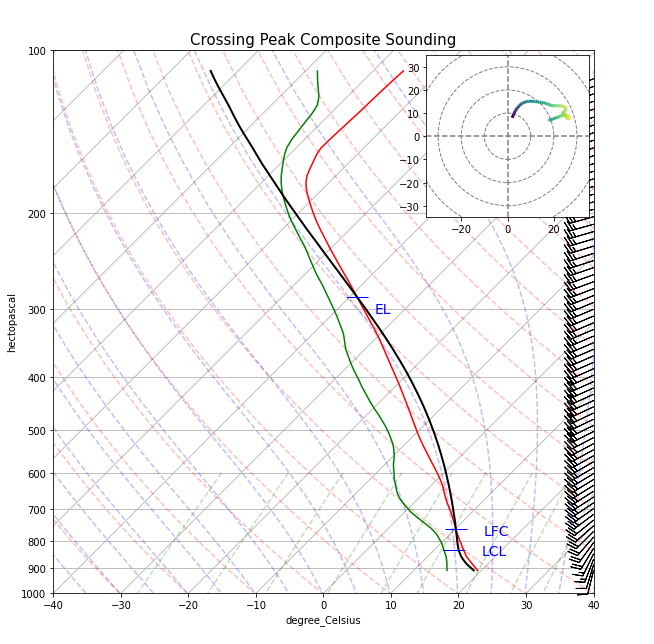

In [6]:
#Peak
pres=((peak['Mean Pressure']).tolist())*units('hPa')
temp=((peak['Mean Temperature']).tolist())*units('degC')
dew=((peak['Mean Dew']).tolist())*units('degC')
prof=((peak['Mean Profile']).tolist())*units('degC')
u=np.array(peak['U Mean'])
v=np.array(peak['V Mean'])
wspd=np.array(peak['Mean Wind Speed'])

lcl_p,lcl_t=mpcalc.lcl(pres[3],temp[3],dew[3]) 
lfc_p,lfc_t=mpcalc.lfc(pres[3:],temp[3:],dew[3:],prof[3:])
el_p,el_t=mpcalc.el(pres[3:],temp[3:],dew[3:],prof[3:])



##Change default to be better for skew-T
fig= plt.figure(figsize=(10,10))
skew = SkewT(fig,rotation=45)

##Plot the data using normal plotting functions, in this case using
##log scaling in Y, as dictated by the typical meteorological plot
skew.plot(pres, temp, 'r')
skew.plot(pres, dew, 'g')
skew.plot_barbs(pres[:-1:2], u[:-1:2], v[:-1:2])

##Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233,533,10)*units('K'),alpha=0.25)
skew.plot_moist_adiabats(t0=np.arange(233,323,5)*units('K'),alpha=0.25)
skew.plot_mixing_lines(alpha=0.25)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40,40)

##Calculate full parcel profile and add to plot as black line
##Requires that the variables have associated units
    #prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
skew.plot(pres, prof, 'k', linewidth=2)


##this will add a line and place where the LCL is located
skew.plot(lcl_p,lcl_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(lcl_t.to('degC').m+5,lcl_p.m+20,'LCL',color='blue',size=14)

##this will add a line and place where the LFC is located
skew.plot(lfc_p,lfc_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(lfc_t.to('degC').m+5,lfc_p.m+20,'LFC',color='blue',size=14)

##this will add a line and place where the EL is located
skew.plot(el_p,el_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(el_t.to('degC').m+5,el_p.m+20,'EL',color='blue',size=14)

    
##Make some titles
plt.title('Crossing Peak Composite Sounding', fontsize=15)

# Create a hodograph
# Create an inset axes object that is 40% width and height of the
# figure and put it in the upper right hand corner.
ax_hod = inset_axes(skew.ax, '30%', '30%', loc=1)
ho = Hodograph(ax_hod, component_range=35.)
ho.add_grid(increment=10)
ho.plot_colormapped(u, v, wspd)  # Plot a line colored by wind speed
plt.savefig('All Crossing Peak Composites.png',dpi=150)

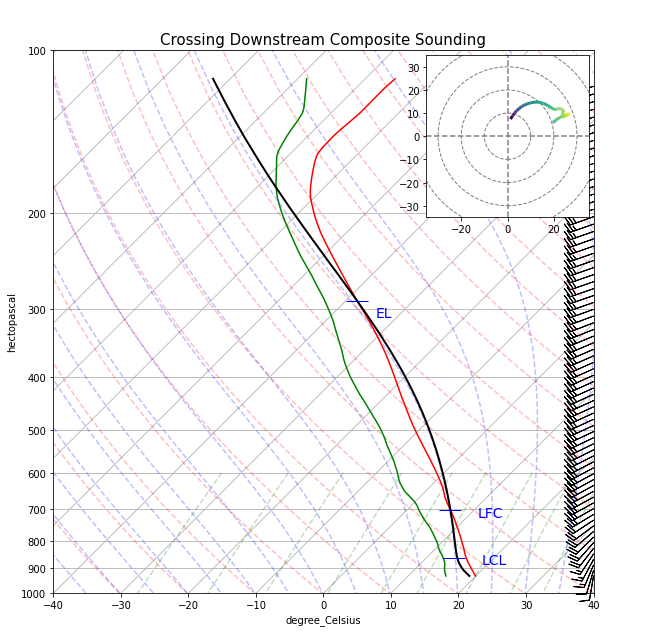

In [7]:
#Downstream
pres=((down['Mean Pressure']).tolist())*units('hPa')
temp=((down['Mean Temperature']).tolist())*units('degC')
dew=((down['Mean Dew']).tolist())*units('degC')
prof=((down['Mean Profile']).tolist())*units('degC')
u=np.array(down['Mean U'])
v=np.array(down['Mean V'])
wspd=np.array(down['Mean Wind Speed'])

lcl_p,lcl_t=mpcalc.lcl(pres[1],temp[1],dew[1]) 
lfc_p,lfc_t=mpcalc.lfc(pres[1:],temp[1:],dew[1:],prof[1:])
el_p,el_t=mpcalc.el(pres[1:],temp[1:],dew[1:],prof[1:])


##Change default to be better for skew-T
fig= plt.figure(figsize=(10,10))
skew = SkewT(fig,rotation=45)

##Plot the data using normal plotting functions, in this case using
##log scaling in Y, as dictated by the typical meteorological plot
skew.plot(pres, temp, 'r')
skew.plot(pres, dew, 'g')
skew.plot_barbs(pres[:-1:2], u[:-1:2], v[:-1:2])

##Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233,533,10)*units('K'),alpha=0.25)
skew.plot_moist_adiabats(t0=np.arange(233,323,5)*units('K'),alpha=0.25)
skew.plot_mixing_lines(alpha=0.25)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40,40)

##Calculate full parcel profile and add to plot as black line
##Requires that the variables have associated units
    #prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
skew.plot(pres, prof, 'k', linewidth=2)


##this will add a line and place where the LCL is located
skew.plot(lcl_p,lcl_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(lcl_t.to('degC').m+5,lcl_p.m+20,'LCL',color='blue',size=14)

##this will add a line and place where the LFC is located
skew.plot(lfc_p,lfc_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(lfc_t.to('degC').m+5,lfc_p.m+20,'LFC',color='blue',size=14)

##this will add a line and place where the EL is located
skew.plot(el_p,el_t.to('degC'), marker='_',  markersize=22, color='blue')
plt.text(el_t.to('degC').m+5,el_p.m+20,'EL',color='blue',size=14)

    
##Make some titles
plt.title('Crossing Downstream Composite Sounding', fontsize=15)

# Create a hodograph
# Create an inset axes object that is 40% width and height of the
# figure and put it in the upper right hand corner.
ax_hod = inset_axes(skew.ax, '30%', '30%', loc=1)
ho = Hodograph(ax_hod, component_range=35.)
ho.add_grid(increment=10)
ho.plot_colormapped(u, v, wspd)  # Plot a line colored by wind speed
plt.savefig('All Crossing Downstream Composites.png',dpi=150)